<a href="https://colab.research.google.com/github/DanielBojchovski/choosing_the_best_model_for_the_car_dataset/blob/main/choosing_the_best_model_for_the_car_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation

In [1]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing the Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


Data Collection and Processing

In [3]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/sample_data/car data.csv')

In [4]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [6]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [9]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [10]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [11]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

Splitting Training and Test data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Compare ML algorithms

In [15]:
clf = LazyRegressor(verbose = 0, ignore_warnings = True, custom_metric = None)
train, test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:04<00:00,  9.77it/s]


In [16]:
# performance on training set
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.98,0.98,0.46,0.24
GradientBoostingRegressor,0.98,0.98,0.50,0.10
BaggingRegressor,0.97,0.98,0.54,0.09
XGBRegressor,0.97,0.97,0.59,0.05
ExtraTreesRegressor,0.96,0.97,0.61,0.31
ExtraTreeRegressor,0.94,0.95,0.77,0.02
DecisionTreeRegressor,0.93,0.94,0.87,0.02
AdaBoostRegressor,0.92,0.94,0.92,0.25
PassiveAggressiveRegressor,0.90,0.93,0.98,0.01


In [17]:
# performance on test set
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.98,0.98,0.46,0.24
GradientBoostingRegressor,0.98,0.98,0.50,0.10
BaggingRegressor,0.97,0.98,0.54,0.09
XGBRegressor,0.97,0.97,0.59,0.05
ExtraTreesRegressor,0.96,0.97,0.61,0.31
ExtraTreeRegressor,0.94,0.95,0.77,0.02
DecisionTreeRegressor,0.93,0.94,0.87,0.02
AdaBoostRegressor,0.92,0.94,0.92,0.25
PassiveAggressiveRegressor,0.90,0.93,0.98,0.01


Visualization of model performance

[(0.0, 1.0)]

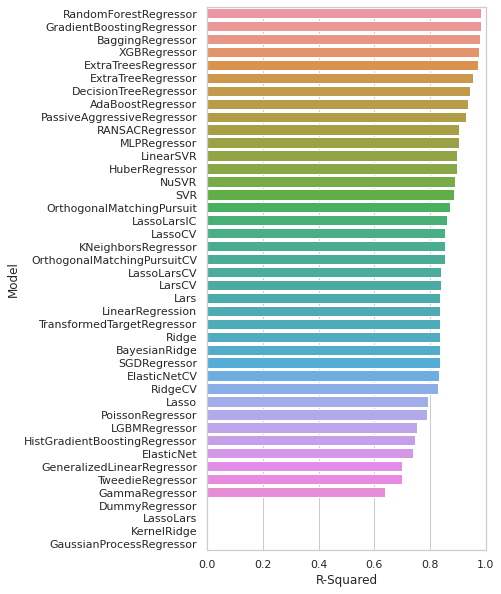

In [18]:
plt.figure(figsize = (5, 10))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(y = train.index, x = "R-Squared", data = train)
ax.set(xlim = (0, 1))

[(0.0, 10.0)]

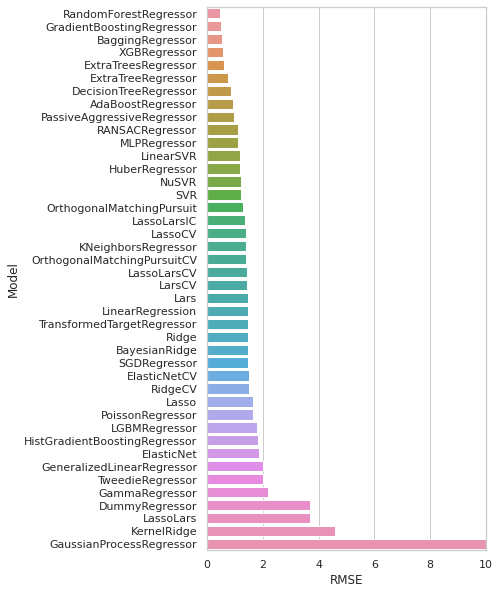

In [19]:
plt.figure(figsize = (5, 10))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(y = train.index, x = "RMSE", data = train)
ax.set(xlim = (0, 10))

RandomForestRegressor is the best model for this data set